### 0. Initial Data Config

In [2]:
from IPython.display import display, HTML
import pandas as pd

# Define the CSS that will make the table scrollable
css = """
.output {
    max-height: 500px; /* Adjust as needed */
    overflow: scroll;  /* Allows scrolling */
}
"""

# Apply the CSS for scrollable output
display(HTML('<style>{}</style>'.format(css)))

# Configure pandas display options for better visuals
pd.set_option('display.max_rows', None)  # Display all rows, adjust as needed
pd.set_option('display.max_columns', None)  # Display all columns, adjust as needed
pd.set_option('display.max_colwidth', 90)  # Set max column width for long text
pd.options.display.float_format = '{:,.2f}'.format  # Format floating-point numbers


In [3]:
import pandas as pd
import configparser

# initiate the config parser
config = configparser.ConfigParser()

# read the config ini file
config.read('config.ini')

# access the file path
csv_file_path = config['paths']['csv_wetland_v1']

### 1. Load and Explore the DataFrame

In [4]:
# Load the dataset
df = pd.read_csv(csv_file_path, encoding='UTF-8-SIG')

# print the DataFrame shape
print(f"The Ramsar Wetland data shape for Latin America and the Caribben is: {df.shape}")
print(f"Wetland distinct count according to the site name: {df['Site name'].nunique()} ")


The Ramsar Wetland data shape for Latin America and the Caribben is: (216, 34)
Wetland distinct count according to the site name: 215 


In [10]:
# filter the dataframe to explore duplicates based on 'Site name'
duplicates_df = df[df.duplicated(subset='Site name', keep=False)]

# display the duplicated rowsin HTML format
display(HTML(duplicates_df.to_html()))

,Ramsar Site No.,Site name,Region,Country,Territory,Designation date,Last publication date,Area (ha),Latitude,Longitude,Annotated summary,Criterion1,Criterion2,Criterion3,Criterion4,Criterion5,Criterion6,Criterion7,Criterion8,Criterion9,Wetland Type,Maximum elevation,Minimum elevation,Montreux listed,Management plan implemented,Management plan available,Ecosystem services,Threats,large administrative region,Global international legal designations,Regional international legal designations,National conservation designation,Does the wetland extend onto the territory of one or more other countries?,Ramsar Advisory Mission?
71,959,Lago Titicaca,Latin America and the Caribbean,Bolivia (Plurinational State of),NaN,1998-09-11,1998-09-11,"800,000.00",-16.17,-68.87,"Lago Titicaca (Sector Boliviano). 26/08/98; La Paz; 800,000 ha; 16°10'S 068°52'W. Transboundary site between Bolivia and Peru. The site is characterized by a mixture of freshwater permanent lakes, rivers, associated marshes and high Andean peatlands. It harbours several rare species and threatened fish, birds and invertebrate species endemic to the high Andes. The area is used for agriculture, fishing, sheep and cattle ranching. Small-scale tourism is becoming more important. Ramsar site no. 959. Most recent RIS information: 1998.",Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,"Inland wetlands, M: Permanent rivers/ streams/ creeks, O: Permanent freshwater lakes, U: Permanent Non-forested peatlands, N: Seasonal/ intermittent/ irregular rivers/ streams/ creeks","4,200.00","3,809.00",No,No,In preparation,"Cultural Services, Scientific and educational, Spiritual and inspirational, Recreation and tourism, Regulating Services, Hazard reduction, Climate regulation, Provisioning Services, Food for humans, Wetland non-food products","Agriculture & aquaculture, Non specified, Livestock farming and ranching, Human settlements (non agricultural), Housing and urban areas, Invasive and other problematic species and genes, Invasive non-native/ alien species, Human intrusions & disturbance, Recreational and tourism activities, Biological resource use, Fishing and harvesting aquatic resources, Pollution, Garbage and solid waste, Unspecified, Household sewage, urban waste water, Transportation and service corridors, Roads and railroads, Unspecified",La Paz,NaN,NaN,NaN,Yes,No
206,881,Lago Titicaca,Latin America and the Caribbean,Peru,NaN,1997-01-20,1997-01-20,"460,000.00",-15.83,-69.50,"Lago Titicaca (Peruvian sector). 20/01/97; Puno; 460,000 ha; 15°50'S 069°30W. Lake Titicaca, in the Central Andes, is the world's highest navigable freshwater lake, at 3810 m above sea level, shared between Peru and Bolivia. The wetland is a permanent freshwater lake, with associated marshes and extensive areas of emergent aquatic vegetation. There are a number of endemic fish species present and the site is extremely important for migratory shorebirds and Andean waterbirds, including three species of flamingo. Algae and submergent and floating vegetation is abundant, and the dominant emergent species is the ""totora"" Schoenoplectus tatora, which can reach up to seven meters. When the ""totora"" drifts away from the shore, it forms islands which are used by some members of the Uro community to live on. Most of them are fishermen and hunters, but they also make crafts to sell. Whilst subsistence fishing is the main use of the lake by the local communities, the surrounding areas are used for agriculture. Ramsar site no. 881. Most recent RIS information: 1996.",Yes,Yes,No,No,Yes,No,No,No,No,"Inland wetlands, W: Shrub-dominated wetlands, O: Permanent freshwater lakes",NaN,NaN,No,Yes,Yes,"Provisioning Services, Wetland non-food products, Food for humans, Fresh water, Cultural Services, Scientific and educational, Spiritual and inspirational, Recreation and tourism","Biological resource use, Gathering terrestrial plants, Hunting and collecting terrestrial animals, Pollution, Household sewage, urban waste water, Industrial and mi

In [10]:
# Display the existing headers (columns) in an HTML format
headers_html = f"<div><b>Existing headers:</b> {list(df.columns)}</div>"
display(HTML(headers_html))

In [11]:
# Display distinct row count for each column in an HTML table
distinct_counts = df.nunique()
distinct_counts_html = f"<div><b>Distinct row count for each column:</b></div>{distinct_counts.to_frame().to_html()}"
display(HTML(distinct_counts_html))

,0
Ramsar Site No.,216
Site name,215
Region,1
Country,27
Territory,0
Designation date,145
Last publication date,132
Area (ha),215
Latitude,212
Longitude,214


### 2. Visualize the data to extract general Insight 

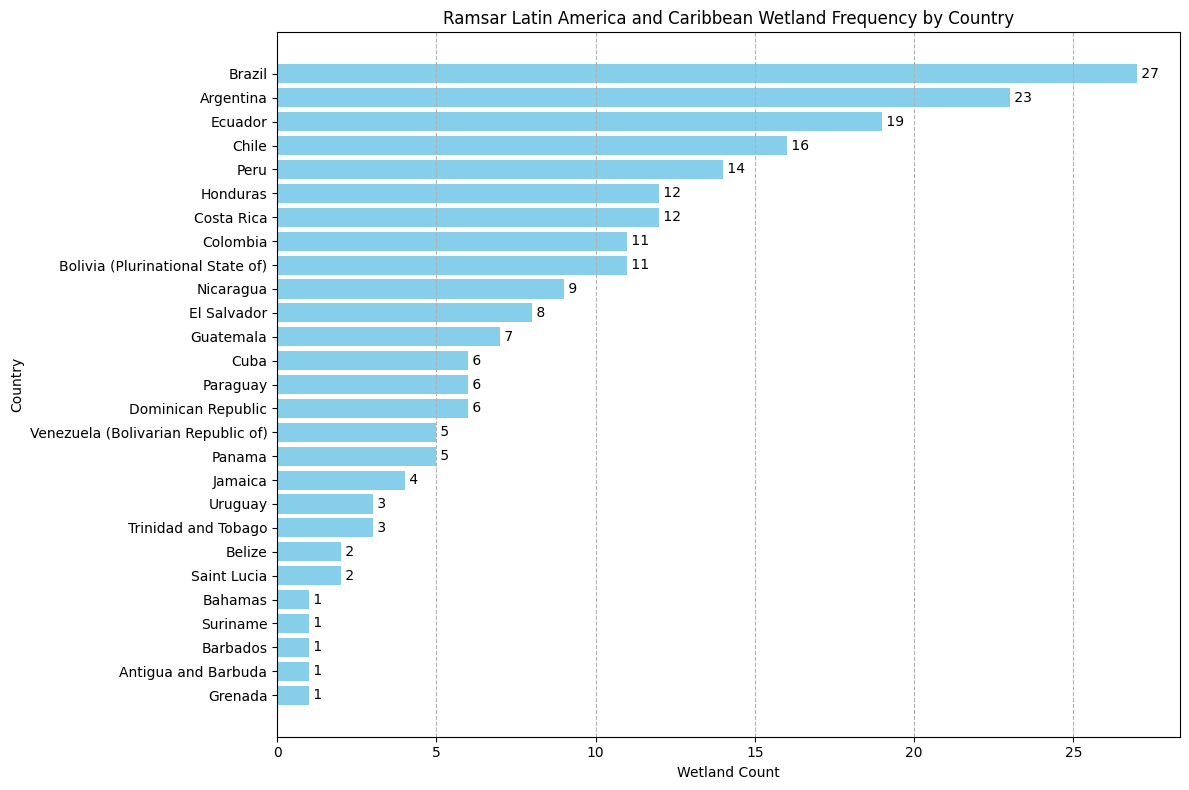

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by country and count the occurrences, then sort in descending order
wetland_counts = df['Country'].value_counts().sort_values(ascending=True)

# Create a DataFrame for easier manipulation
wetland_counts_df = pd.DataFrame(wetland_counts).reset_index()
wetland_counts_df.columns = ['Country', 'Wetland Count']


# Create a bar chart with specified colors
plt.figure(figsize=(12, 8))
plt.barh(wetland_counts_df['Country'], wetland_counts_df['Wetland Count'], color='skyblue')

# Add titles and labels
plt.title('Ramsar Latin America and Caribbean Wetland Frequency by Country')
plt.xlabel('Wetland Count')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=1.0)

# Add counts next to the country names
for index, value in enumerate(wetland_counts_df['Wetland Count']):
    plt.text(value, index, f' {value}', va='center')

plt.tight_layout()
plt.show()


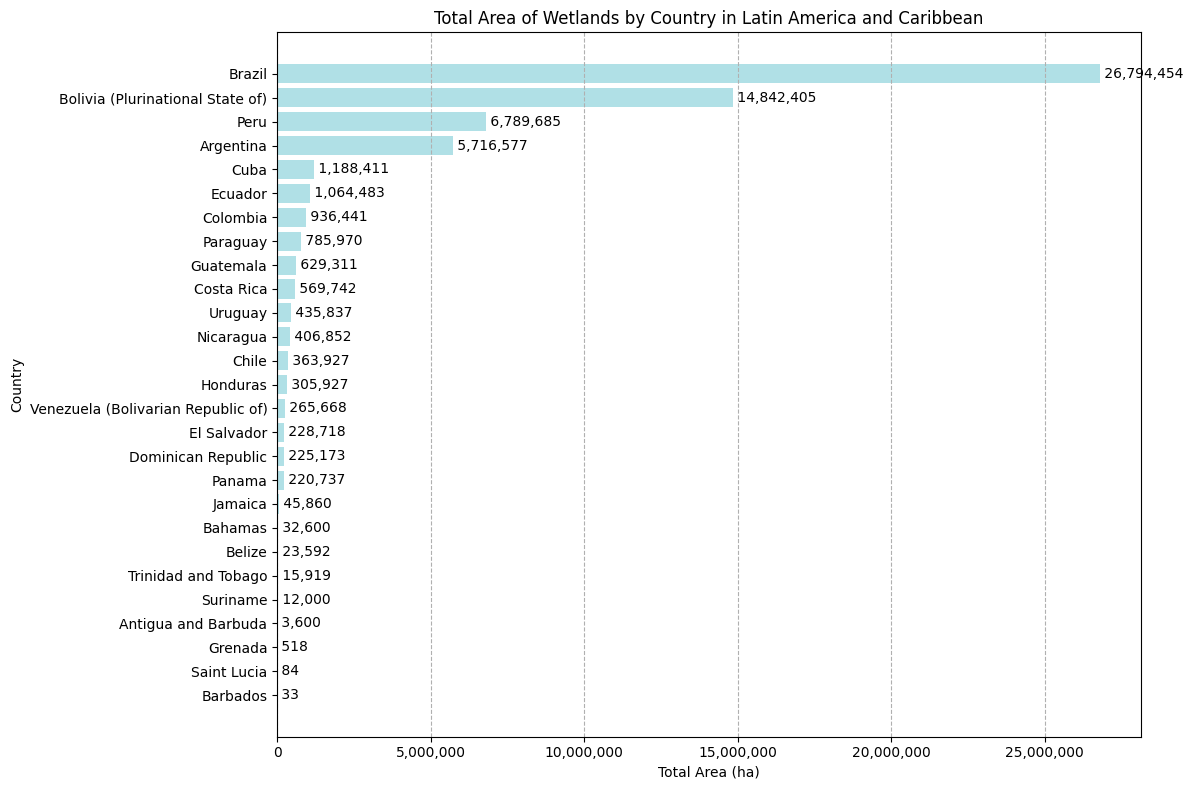

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Group by country and sum the area in hectares, then sort in descending order
total_area_by_country = df.groupby('Country')['Area (ha)'].sum().sort_values(ascending=True)

# Create a DataFrame for easier manipulation
area_by_country_df = pd.DataFrame(total_area_by_country).reset_index()
area_by_country_df.columns = ['Country', 'Total Area (ha)']

# Create a formatter function for readability
def thousands_formatter(x, pos):
    return f'{int(x):,}'  # Format with commas

# Create a bar chart with specified colors
plt.figure(figsize=(12, 8))
plt.barh(area_by_country_df['Country'], area_by_country_df['Total Area (ha)'], color='powderblue')

# Add titles and labels
plt.title('Total Area of Wetlands by Country in Latin America and Caribbean')
plt.xlabel('Total Area (ha)')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=1.0)

# Add total area next to the country names
for index, value in enumerate(area_by_country_df['Total Area (ha)']):
    plt.text(value, index, f' {int(value):,}', va='center')  # Format with commas for readability

# Apply the formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.tight_layout()
plt.show()